In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# calculate MRE: molar residue ellipticity
 ### protein information, change them accordingly
sample_concentration = 0.35  # g/L, or mg/mL
cell_pathlength = 0.1       # 0.1cm or 1mm
molecular_weight = 14052    # g/mol
number_residue = 119    # with tag

In [19]:
# data input:
mono_w25c =pd.read_csv("./Gabi_11032018_gtr_bb_08_mon_25C.txt", header=0, sep='\s+')
mono_w75c =pd.read_csv("./Gabi_11032018_gtr_bb_08_mon_75C.txt", header=0, sep='\s+')
mono_w95c =pd.read_csv("./Gabi_11032018_gtr_bb_08_mon_95C.txt", header=0, sep='\s+')
mono_w25c_back =pd.read_csv("./Gabi_11032018_gtr_bb_08_mon_25C_back.txt", header=0, sep='\s+')
mono_Tm_226 = pd.read_csv("./Gabi_11032018_gtr_bb_08_mon_temp.txt", header=0, sep='\s+')
tet_w25c =pd.read_csv("./Gabi_11032018_gtr_bb_08_tet_25C.txt", header=0, sep='\s+')
tet_w75c =pd.read_csv("./Gabi_11032018_gtr_bb_08_tet_75C.txt", header=0, sep='\s+')
tet_w95c =pd.read_csv("./Gabi_11032018_gtr_bb_08_tet_95C.txt", header=0, sep='\s+')
tet_w25c_back =pd.read_csv("./Gabi_11032018_gtr_bb_08_tet_25C_back.txt", header=0, sep='\s+')
tet_Tm_226 = pd.read_csv("./Gabi_11032018_gtr_bb_08_tet_temp.txt", header=0, sep='\s+')

In [21]:
w25C = mono_w25c
w75C = mono_w75c
w95C = mono_w95c
w25C_back = mono_w25c_back
Tm = mono_Tm_226

w25C_2 = tet_w25c
w75C_2 = tet_w75c
w95C_2 = tet_w95c
w25C_back_2 = tet_w25c_back
Tm_2 = tet_Tm_226

In [22]:
MRE_w25C = (w25C.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)
MRE_w75C = (w75C.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)
MRE_w95C = (w95C.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)
MRE_w25C_back = (w25C_back.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)

#Tm.CD_Signal

MRE_Tm_226 = (Tm.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)

#tetramer
MRE_w25C_2 = (w25C_2.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)
MRE_w75C_2 = (w75C_2.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)
MRE_w95C_2 = (w95C_2.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)
MRE_w25C_back_2 = (w25C_back_2.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)

#Tm.CD_Signal

MRE_Tm_226_2 = (Tm_2.CD_Signal * molecular_weight) / (10*cell_pathlength*sample_concentration*number_residue)

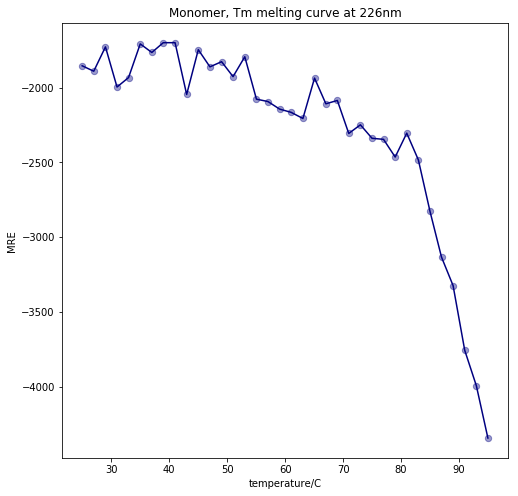

In [37]:
# plotting
## melting curve:
fig = plt.figure(figsize =(8, 8))

t = Tm.X
yt = MRE_Tm_226
plt.title('Monomer, Tm melting curve at 226nm')
plt.xlabel("temperature/C")
plt.ylabel("MRE")

blue_dots = plt.scatter(t, yt, c="navy", marker='o', 
                     edgecolors="navy", s=40, alpha=0.4)
plt.plot(t, yt, color="navy")
fig.savefig("mon_thermal_melting.png", dpi=300, bbox_inches='tight')

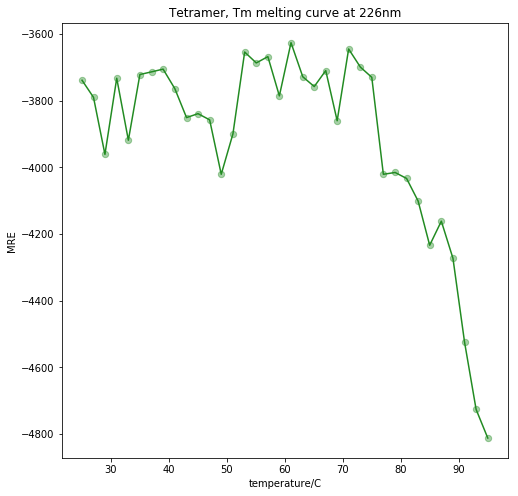

In [36]:
fig = plt.figure(figsize =(8, 8))

plt.title('Tetramer, Tm melting curve at 226nm')
plt.xlabel("temperature/C")
plt.ylabel("MRE")
t = Tm_2.X
yt = MRE_Tm_226_2
green_dots = plt.scatter(t, yt, c="forestgreen", marker='o', 
                     edgecolors="forestgreen", s=40, alpha=0.4)
plt.plot(t, yt, color="forestgreen")
fig.savefig("tet_thermal_melting.png", dpi=300, bbox_inches='tight')

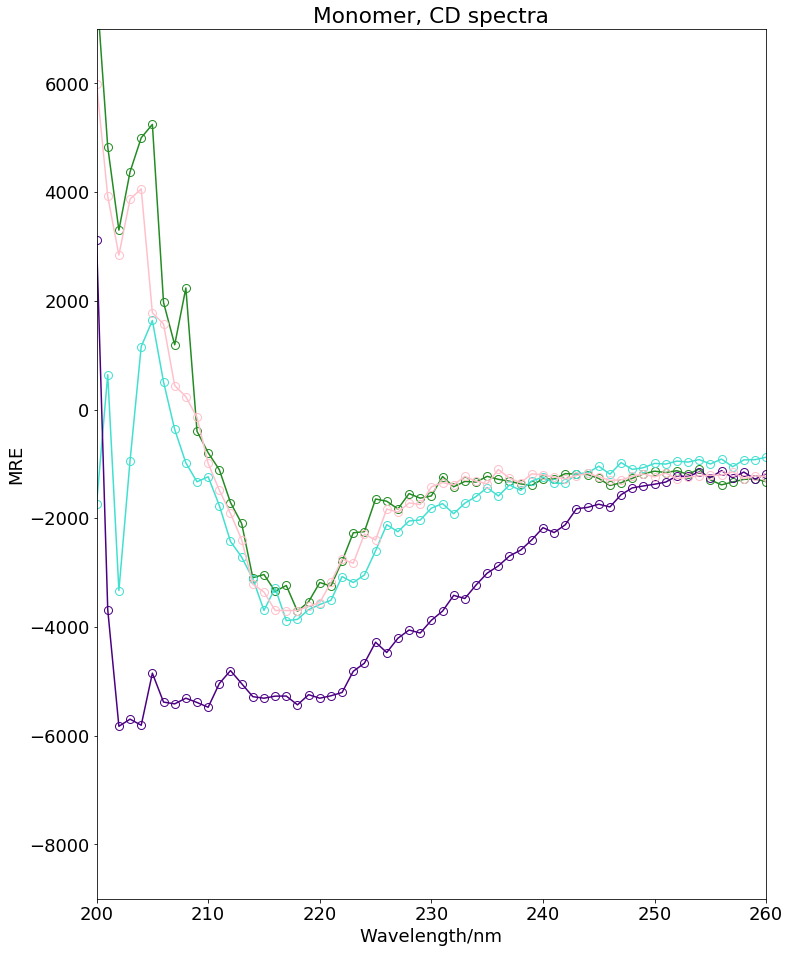

In [40]:
plt.rcParams.update({'font.size': 18})
## wavescan
fig = plt.figure(figsize =(12,16))
plt.plot(w25C.X, MRE_w25C, '-o', color="forestgreen",
         markerfacecolor='none', 
         markersize=8, 
         markeredgecolor="forestgreen",
         markeredgewidth=1.0)
plt.plot(w75C.X, MRE_w75C, '-o', color="turquoise", 
         markersize=8, markeredgecolor="turquoise",
         markerfacecolor='none',
        markeredgewidth=1.0)

plt.plot(w95C.X, MRE_w95C, '-o', color="indigo", markersize=8,
         markeredgewidth=1.0, markerfacecolor='none', markeredgecolor="indigo")

plt.plot(w25C_back.X, MRE_w25C_back, '-o', color="pink", 
         markerfacecolor='none', markersize=8, markeredgecolor="pink",
        markeredgewidth=1.0)

plt.xlim(200,260)
plt.ylim(-9000, 7000)

plt.title('Monomer, CD spectra')
plt.xlabel("Wavelength/nm")
plt.ylabel("MRE")
fig.savefig("mon_refolding.png", dpi=300, bbox_inches='tight')

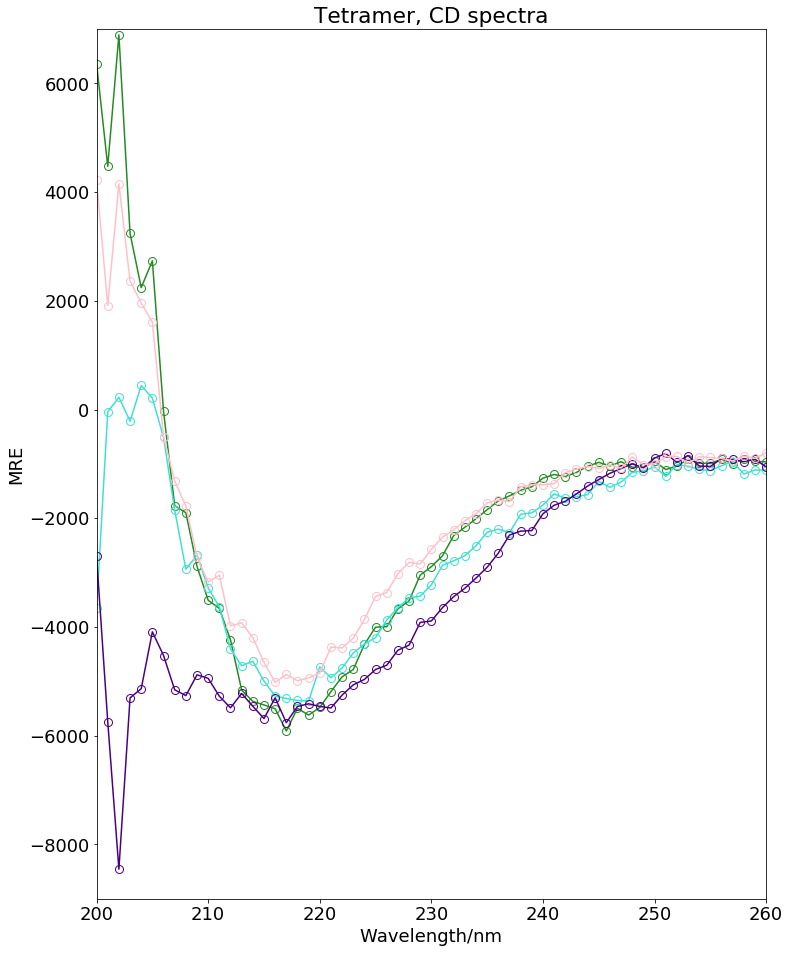

In [41]:
## wavescan
fig = plt.figure(figsize =(12,16))
plt.plot(w25C.X, MRE_w25C_2, '-o', color="forestgreen",
         markerfacecolor='none', 
         markersize=8, 
         markeredgecolor="forestgreen",
         markeredgewidth=1.0)
plt.plot(w75C.X, MRE_w75C_2, '-o', color="turquoise", 
         markersize=8, markeredgecolor="turquoise",
         markerfacecolor='none',
        markeredgewidth=1.0)

plt.plot(w95C.X, MRE_w95C_2, '-o', color="indigo", markersize=8,
         markeredgewidth=1.0, markerfacecolor='none', markeredgecolor="indigo")

plt.plot(w25C_back.X, MRE_w25C_back_2, '-o', color="pink", 
         markerfacecolor='none', markersize=8, markeredgecolor="pink",
        markeredgewidth=1.0)

plt.xlim(200,260)
plt.ylim(-9000, 7000)

plt.title('Tetramer, CD spectra')
plt.xlabel("Wavelength/nm")
plt.ylabel("MRE")
fig.savefig("tet_refolding.png", dpi=300, bbox_inches='tight')